In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from fastai.vision import *
from pathlib import Path
from fastai.callbacks.mixup import MixUpCallback
from fastai.callbacks.oversampling import OverSamplingCallback

In [3]:
path = Path('/home/rubn/Desktop/og')

In [4]:
dx = ImageList.from_folder(path).split_by_folder(train='train', valid='val').label_from_folder().databunch().normalize(imagenet_stats)

In [5]:
dx

ImageDataBunch;

Train: LabelList (5511 items)
x: ImageList
Image (3, 300, 1000),Image (3, 300, 1000),Image (3, 300, 1000),Image (3, 300, 1000),Image (3, 300, 1000)
y: CategoryList
Healthy,Healthy,Healthy,Healthy,Healthy
Path: /home/rubn/Desktop/og;

Valid: LabelList (1381 items)
x: ImageList
Image (3, 300, 1000),Image (3, 300, 1000),Image (3, 300, 1000),Image (3, 300, 1000),Image (3, 300, 1000)
y: CategoryList
Healthy,Healthy,Healthy,Healthy,Healthy
Path: /home/rubn/Desktop/og;

Test: None

In [6]:
learn = cnn_learner(dx, models.vgg19_bn, callback_fns=[MixUpCallback, OverSamplingCallback])

In [7]:
learn.data.batch_size = 8

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.00E-07
Min loss divided by 10: 4.37E-08


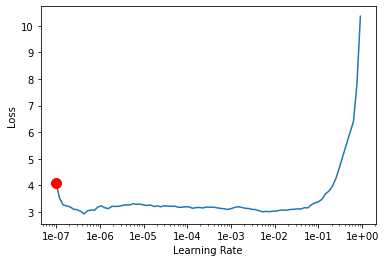

In [8]:
learn.lr_find()
learn.recorder.plot(skip_start=0, skip_end=2, suggestion=True)

In [9]:
lr = 1e-03

In [10]:
learn.fit_one_cycle(4, slice(lr))

epoch,train_loss,valid_loss,time
0,1.427943,1.211993,46:05
1,1.187250,1.001140,46:12
2,1.078838,0.852624,46:09
3,1.038549,0.969507,46:12


In [11]:
learn.unfreeze()
learn.freeze_to(3)
learn.fit_one_cycle(2, max_lr=slice(lr/100, lr/10))  

epoch,train_loss,valid_loss,time
0,1.020188,0.888783,46:07
1,1.038098,0.974258,46:05


In [12]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

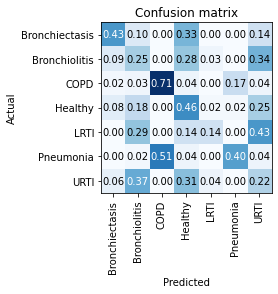

In [13]:
interp.plot_confusion_matrix(normalize=True)